In [1]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight') # Style Sheet

In [2]:
log = pd.read_csv('./Login.csv')

In [3]:
# Twitter API credentials

consumerKey = log['key'][2]
consumerSecret = log['key'][3]
accessToken = log['key'][0]
accessTokenSecret = log['key'][1]

In [4]:
# Create the authentication object
authenticate = tweepy.OAuthHandler(consumerKey,consumerSecret)

# Set the access token and access token secret
authenticate.set_access_token(accessToken, accessTokenSecret)

# Create the API object while passing in the auth information
api = tweepy.API(authenticate, wait_on_rate_limit = True)

In [5]:
places = api.geo_search(query="PHI",granularity="country")
place_id = places[0].id
#tweets = api.search(q="place:%s" % place_id)

In [6]:
# Extract tweets from the twitter user
posts = api.search(q="online class"+" place:{}".format(place_id),count=100,tweet_mode="extended")



# Print the last 5 tweets from the account

print("Show the 5 recent tweets: \n")
i=1
for tweet in posts[0:5]:
    print(str(i) + ') '+tweet.full_text + '\n')
    i+=1

Show the 5 recent tweets: 

1) Tapos na sa online class tapod din sa online meeting sa work huhuhuh

2) kung kailan oras ng online class tsaka nagloloko internet

3) Ang hirap 😓 hind ko kaya mag online class ng 3am to 5:30am huhu

4) online class with vmin💜 https://t.co/lEPrmxVpRa

5) @TV5manila rodalyn aldama
nueva ecija
09557725381
#lolflashbackfriday

sna po 1 ako sa mapili nyo n matulungan isa po akong solo parent at may 3anak.pang online class po sana pra sa pg aaral ng aking mga anakat konting dagdag phunan.Di po kumpleto ang aming tanghalian pg wla ang tropang lol



In [7]:
# Create a DataFrame with a column called Tweets

df = pd.DataFrame([tweet.full_text for tweet in posts] , columns=['Tweets'])

# Show the first 5 rows of data
df

,Tweets
0,Tapos na sa online class tapod din sa online m...
1,kung kailan oras ng online class tsaka naglolo...
2,Ang hirap 😓 hind ko kaya mag online class ng 3...
3,online class with vmin💜 https://t.co/lEPrmxVpRa
4,@TV5manila rodalyn aldama\nnueva ecija\n095577...
...,...
79,@_hansjob_ Tama very sturdy. 10/10 would recom...
80,Curious lang po ako. Bakit nung F2F classes eh...
81,#GaanoKaKamalas Ang active ko magparticipate s...
82,Napaka agang online class 🤦\nGantong oras natu...


In [8]:
#Clean the tweets
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) #Removed @mentions
    text = re.sub(r'#', '', text) #Removing the '#' symbol
    text = re.sub(r'RT[\s]+', '', text) # Removing RT
    text = re.sub(r'https?:\/\/\S+', '', text) # Removing hyperlink
    
    return text

# Cleaning the text
df['Tweets']=df['Tweets'].apply(cleanTxt)



In [9]:
# Show the cleaned text
#pd.set_option('display.max_colwidth', None) #change Display option
#pd.reset_option('^display.', silent=True) #Resets all option
df.head()

,Tweets
0,Tapos na sa online class tapod din sa online m...
1,kung kailan oras ng online class tsaka naglolo...
2,Ang hirap 😓 hind ko kaya mag online class ng 3...
3,online class with vmin💜
4,rodalyn aldama\nnueva ecija\n09557725381\nlol...


In [10]:

text = "The quick brown fox jumps over the lazy dog."
# remove words between 1 and 3
shortword = re.compile(r'\W*\b\w{1,3}\b')
print(shortword.sub('', text))

 quick brown jumps over lazy.


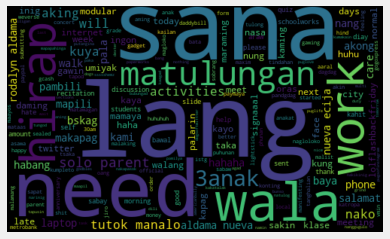

In [11]:
# Plot Word Cloud
allWords = ' '.join([twts for twts in df['Tweets']])
allWords = allWords.lower()

#Remove 'online Class'
removeWords = """online class yung para pero naman araw 
                hindi tapos kasi talaga shopeeph1010 shopeephbigatenfestival
                pang"""
for x in allWords.split():
    for i in removeWords.split():
        if x == i:
            patt = re.compile('(\s*){}(\s*)'.format(i))
            allWords=patt.sub('\\1 \\2', allWords)
            
#patt = re.compile('(\s*)online class(\s*)')
#allWords=patt.sub('\\1 \\2', allWords)

#Restrict 2 letter word
shortword = re.compile(r'\W*\b\w{1,3}\b')
allWords = shortword.sub('', allWords)

#wordCloud = WordCloud(width = 500, height =300, random_state = 21, max_font_size = 119).generate(allWords)
wordCloud = WordCloud(width = 500, height =300, random_state = 21).generate(allWords)

plt.imshow(wordCloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# ====================== NAIVE BAYES ======================

In [12]:
import nltk
from nltk.corpus import twitter_samples
import numpy as np
import pandas as pd

In [13]:
sentiment_df = pd.read_csv("tweet_dataset.csv")

In [14]:
# select the set of positive and negative tweets
all_positive_tweets = sentiment_df['positive'].tolist()
all_negative_tweets = sentiment_df['negative'].tolist()

In [15]:
print('Number of positive tweets: ', len(all_positive_tweets))
print('Number of negative tweets: ', len(all_negative_tweets))

print('\nThe type of all_positive_tweets is: ', type(all_positive_tweets))
print('The type of a tweet entry is: ', type(all_negative_tweets[0]))

Number of positive tweets:  5041
Number of negative tweets:  5041

The type of all_positive_tweets is:  <class 'list'>
The type of a tweet entry is:  <class 'str'>


In [16]:
print("Positive Tweet Example:")
print(all_positive_tweets[0])

print("\nNegative Tweet Example:")
print(all_negative_tweets[0])

Positive Tweet Example:
#GaanoKaKamalas Ang active ko magparticipate sa online class eh maling meeting room naman pala yung napasukan ko. Naperfect ko pa yung recitation at quiz. #TheMorningRush

Negative Tweet Example:
@PLDT_Cares Good morning. I have again an LOS issue. I did all the necessary troubleshooting but to no avail. Sent you a DM. Location: Mambog Uno, Bacoor, Cavite Please help. 2 of us are working from home and we have 2 students doing online class Thank you.


# Preprocess Tweets

In [17]:
import re                                  # library for regular expression operations
import string                              # for string operations

from nltk.corpus import stopwords          # module for stop words that come with NLTK
from nltk.stem import PorterStemmer        # module for stemming
from nltk.tokenize import TweetTokenizer   # module for tokenizing strings

### Remove hyperlinks, Twitter marks and styles

We do not want to use every word in a tweet because many tweets have hashtags, retweet marks, and hyperlinks. We will use regular expressions to remove them from a tweet.

In [18]:
def remove_hyperlinks_marks_styles(tweet):
    
    # remove old style retweet text "RT"
    new_tweet = re.sub(r'^RT[\s]+', '', tweet)

    # remove hyperlinks
    new_tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', new_tweet)

    # remove hashtags
    # only removing the hash # sign from the word
    new_tweet = re.sub(r'#', '', new_tweet)
    
    return new_tweet

### Tokenize the string

To tokenize means to split a string into individual words.

In [19]:
# instantiate tokenizer class
tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)

def tokenize_tweet(tweet):
    
    tweet_tokens = tokenizer.tokenize(tweet)
    
    return tweet_tokens

### Remove stop works and punctuations

Remove stop words and punctuations. Stop words are words that don't add significant meaning to the text. For example, 'i' and 'me'.

In [20]:
#nltk.download('stopwords')

#Import the english stop words list from NLTK
stopwords_english = stopwords.words('english')

punctuations = string.punctuation

def remove_stopwords_punctuations(tweet_tokens):
    
    tweets_clean = []
    
    for word in tweet_tokens:
        if (word not in stopwords_english and word not in punctuations):
            tweets_clean.append(word)
            
    return tweets_clean

In [21]:
stopwords_tagalog = stopwords.words('tagalog')

punctuations = string.punctuation

def remove_stopwords_punctuations(tweet_tokens):
    
    tweets_clean = []
    
    for word in tweet_tokens:
        if (word not in stopwords_english and word not in punctuations):
            tweets_clean.append(word)
            
    return tweets_clean

### Stemming

The process of converting a word to its most general form, or stem.

learning -> learn

learned -> learn

learnt -> learn

In [22]:
stemmer = PorterStemmer()

def get_stem(tweets_clean):
    
    tweets_stem = []
    
    for word in tweets_clean:
        stem_word = stemmer.stem(word)
        tweets_stem.append(stem_word)
        
    return tweets_stem

In [23]:
tweet_example = all_positive_tweets[2277]
print(tweet_example)

processed_tweet = remove_hyperlinks_marks_styles(tweet_example)
print("\nRemoved hyperlinks, Twitter marks and styles:")
print(processed_tweet)

tweet_tokens = tokenize_tweet(processed_tweet)
print("\nTokenize the string:")
print(tweet_tokens)

tweets_clean = remove_stopwords_punctuations(tweet_tokens)
print("\nRemove stop words and punctuations:")
print(tweets_clean)

tweets_stem = get_stem(tweets_clean)
print("\nGet stem of each word:")
print(tweets_stem)

@BarbieDevotees lyka follow back na :)

Removed hyperlinks, Twitter marks and styles:
@BarbieDevotees lyka follow back na :)

Tokenize the string:
['lyka', 'follow', 'back', 'na', ':)']

Remove stop words and punctuations:
['lyka', 'follow', 'back', 'na', ':)']

Get stem of each word:
['lyka', 'follow', 'back', 'na', ':)']


### Combine all preprocess techniques

In [24]:
def process_tweet(tweet):
    
    processed_tweet = remove_hyperlinks_marks_styles(tweet)
    tweet_tokens = tokenize_tweet(processed_tweet)
    tweets_clean = remove_stopwords_punctuations(tweet_tokens)
    tweets_stem = get_stem(tweets_clean)
    
    return tweets_stem

In [25]:
tweet_example = all_negative_tweets[1000]
print(tweet_example)

processed_tweet = process_tweet(tweet_example)
print(processed_tweet)

I can't finish my Sanum today! :(
#LLAOLLAO #Dessert but too full
["can't", 'finish', 'sanum', 'today', ':(', 'llaollao', 'dessert', 'full']


### Split data into two pieces, one for training and one for testing

In [26]:
test_pos = all_positive_tweets[4000:]
train_pos = all_positive_tweets[:4000]
test_neg = all_negative_tweets[4000:]
train_neg = all_negative_tweets[:4000]

train_x = train_pos + train_neg
test_x = test_pos + test_neg

train_y = np.append(np.ones(len(train_pos)), np.zeros(len(train_neg)))
test_y = np.append(np.ones(len(test_pos)), np.zeros(len(test_neg)))

### Create frequency dictionary

In [27]:
def create_frequency(tweets, ys):
    
    freq_d = {}

    # TODO: Create frequency dictionary
    for tweet, y in zip(tweets,ys):
        for word in process_tweet(tweet):
            
            pair = (word, y)
            if pair in freq_d:
                freq_d[pair] += 1
            else:
                freq_d[pair] = freq_d.get(pair, 1)
    
    return freq_d

In [28]:
# testing function

tweets = ['i am happy', 'i am tricked', 'i am sad', 'i am tired', 'i am tired']
ys = [1, 0, 0, 0, 0]

freq_d = create_frequency(tweets, ys)
print(freq_d)

{('happi', 1): 1, ('trick', 0): 1, ('sad', 0): 1, ('tire', 0): 2}


## Train model using Naive Bayes

In [29]:
# build the freqs dictionary

freqs = create_frequency(train_x, train_y)

In [30]:
def train_naive_bayes(freqs, train_x, train_y):
    '''
    Input:
        freqs: dictionary from (word, label) to how often the word appears
        train_x: a list of tweets
        train_y: a list of labels correponding to the tweets (0,1)
    Output:
        logprior: the log prior. (equation 3 above)
        loglikelihood: the log likelihood of you Naive bayes equation. (equation 6 above)
    '''
    
    loglikelihood = {}
    logprior = 0
    
    # calculate the number of unique words in vocab
    unique_words = set([pair[0] for pair in freqs.keys()])
    V = len(unique_words)
    
    # calculate N_pos and N_neg
    N_pos = N_neg = 0
    for pair in freqs.keys():
        
        # TODO: get N_pos and N_get
        if pair[1]>0:
            N_pos += freqs[(pair)]
        else:
            N_neg += freqs[(pair)]
            
            
    # TODO: calculate the number of documents (tweets)
    D = train_y.shape[0]
    
    # TODO: calculate D_pos, the number of positive documents (tweets)
    D_pos = sum(train_y)
    
    # TODO: calculate D_neg, the number of negative documents (tweets)
    D_neg = D - sum(train_y)
    
    # TODO: calculate logprior
    logprior = np.log(D_pos) - np.log(D_neg)
    
    # for each unqiue word
    for word in unique_words:
        
        # get the positive and negative frequency of the word
        freq_pos = freqs.get((word,1),0)
        freq_neg = freqs.get((word,0),0)
        
        # calculate the probability that word is positive, and negative
        p_w_pos = (freq_pos +1) / (N_pos + V)
        p_w_neg = (freq_neg +1) / (N_neg + V)
        
        # calculate the log likelihood of the word
        loglikelihood[word] = np.log(p_w_pos / p_w_neg)
        
    return logprior, loglikelihood

In [31]:
logprior, loglikelihood = train_naive_bayes(freqs, train_x, train_y)
print(logprior)
print(len(loglikelihood))

0.0
9352


## Predict Tweets!

In [32]:
# UNQ_C4 (UNIQUE CELL IDENTIFIER, DO NOT EDIT)
def naive_bayes_predict(tweet, logprior, loglikelihood):
    '''
    Input:
        tweet: a string
        logprior: a number
        loglikelihood: a dictionary of words mapping to numbers
    Output:
        p: the sum of all the logliklihoods of each word in the tweet (if found in the dictionary) + logprior (a number)

    '''

    # TODO: process the tweet to get a list of words
    word_l = process_tweet(tweet)

    # TODO: initialize probability to zero
    p = 0

    # TODO: add the logprior
    p += logprior

    for word in word_l:

        # TODO: get log likelihood of each keyword
        if word in loglikelihood:
            p+= loglikelihood[word]

    return p

In [33]:
predicted_tweets_list = []
for tweet in df['Tweets']:
    p = naive_bayes_predict(tweet, logprior, loglikelihood)
    #print(f'{tweet} -> {p:.2f}')
    predicted_tweets_list.append(round(p,2))


In [34]:
df['Polarity'] = predicted_tweets_list
df

,Tweets,Polarity
0,Tapos na sa online class tapod din sa online m...,-4.46
1,kung kailan oras ng online class tsaka naglolo...,-4.50
2,Ang hirap 😓 hind ko kaya mag online class ng 3...,-12.97
3,online class with vmin💜,-1.20
4,rodalyn aldama\nnueva ecija\n09557725381\nlol...,-7.54
...,...,...
79,@_hansjob_ Tama very sturdy. 10/10 would recom...,1.84
80,Curious lang po ako. Bakit nung F2F classes eh...,-18.05
81,GaanoKaKamalas Ang active ko magparticipate sa...,-6.62
82,Napaka agang online class 🤦\nGantong oras natu...,-6.35


# ============================================================

In [35]:
# Create function to get the subjectivity

def getSubjectivity(text):
    return round((TextBlob(text).sentiment.subjectivity),3)

# Create a function to get the polarity
def getPolarity(text):
    return round((TextBlob(text).sentiment.polarity),3)

# Create two new columns
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
#df['Polarity'] = df['Tweets'].apply(getPolarity)


df

,Tweets,Polarity,Subjectivity
0,Tapos na sa online class tapod din sa online m...,-4.46,0.0
1,kung kailan oras ng online class tsaka naglolo...,-4.50,0.0
2,Ang hirap 😓 hind ko kaya mag online class ng 3...,-12.97,0.0
3,online class with vmin💜,-1.20,0.0
4,rodalyn aldama\nnueva ecija\n09557725381\nlol...,-7.54,0.7
...,...,...,...
79,@_hansjob_ Tama very sturdy. 10/10 would recom...,1.84,0.3
80,Curious lang po ako. Bakit nung F2F classes eh...,-18.05,1.0
81,GaanoKaKamalas Ang active ko magparticipate sa...,-6.62,0.6
82,Napaka agang online class 🤦\nGantong oras natu...,-6.35,0.0


In [36]:
# Create a function to compute the negative, neutral and positive analysis
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
    
df['Analysis'] = df['Polarity'].apply(getAnalysis)


In [37]:
red_tweets = ['rodalyn aldama','tutokparamanalo','lolflashbackfriday','Official Lightstick Pen']
sentences = []
tweets_to_delete = []
tweets_index = []

for words in df['Tweets']:
    sentences.append(words)

for i in red_tweets:
    for x in range(len(sentences)):
        if i in sentences[x]:
            tweets_to_delete.append(sentences[x])

for j in tweets_to_delete:
    for n in range(df['Tweets'].count()):
        if j == df['Tweets'][n]:
            #df_test = df_test.drop(n)
            tweets_index.append(n)
tweets_index_final = []
[tweets_index_final.append(u) for u in tweets_index if u not in tweets_index_final]
for c in tweets_index_final:
    df = df.drop(c)

df = df.reset_index()

In [38]:
# Print all of the positive tweets

j=1
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0, sortedDF.shape[0]):
    if sortedDF['Analysis'][i]=='Positive':
            print(str(j) + ')' +sortedDF['Tweets'][i])
            print()
            j+=1
        
    


1)Dexter’s online class. 😅
puglove pugsofinstagram puglife @ Iligan City 

2)Tungod aning online class maapil tas DL hahaha

3)I am in Online class and scroll through Twitter and I found out that I got blocked by that SIOPAO 

🤣🤣🤣🤣🤣🤣 

4)Power dependent 😅… online class yarn?! 🤣 

5)Masking sige pamo ingon maot mag modular or online class kay way matun an tapos boring daw haha. naa rajud na studyante guys.

6)online class ft. food serye, chsr. 

7)Next week man online class si ya tamen si kaito 😆

8)Saving some pic nga poydi i-background sa Online class hahaha bahala mo class haha
HometownChaChaChaEp16

9)Online class is waving nanaman.

10)Online class in a nutshell:
Complying reqs &gt; Quality learning
🙂

11)Na realize man diay nako nga di man diay kay mama gikan laptop HAHAHAHAHAH so pwede nako siya ipahiram kay asherah pang online class HAHAHHAHAA

12)Online class is real ❤️
Iloveyou ate dannah louise baquil 😍😘 

13)Perks of an Online Class 🤣 @ Catbalogan, Samar 

14)shet, It's a go

In [39]:
# Print all of the negative tweets

j=1
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0, sortedDF.shape[0]):
    if sortedDF['Analysis'][i]=='Negative':
            print(str(j) + ')' +sortedDF['Tweets'][i])
            print()
            j+=1

1)Tapos na sa online class tapod din sa online meeting sa work huhuhuh

2)kung kailan oras ng online class tsaka nagloloko internet

3)Ang hirap 😓 hind ko kaya mag online class ng 3am to 5:30am huhu

4)online class with vmin💜 

5)SABAW NANAMAN SA ONLINE CLASS SA MALAMANG

6)manifesting money pambili ng gadget for online class😭🤞

7)Mamaya online class naman ni jiro 😭 sana di magloko

8)istg!!! face to face classes is way better than online class shit.

9)since the online class started feeling ko mataas na grade ko😭 

10) Di na nga makapag-online class nang maayos sa sobrang daming paperworks 🥲

11)Atm: nanggugulo sa online class ng bunso namin 😂

12)Last one class tomorrow. Mapapahinga na kakatalak ko online. Hahaha

13)Pakatapos mag grind online class naman

14)Online class 😂Onlineclasses DogsofTwittter americanbully dogs 

15)Putangina normal bang umiyak habang nasa online class

16)Yung late ka na nakapasok sa Meet ng Online Class mo. Tapos ito kaagad narinig mo.

"That's all for tod

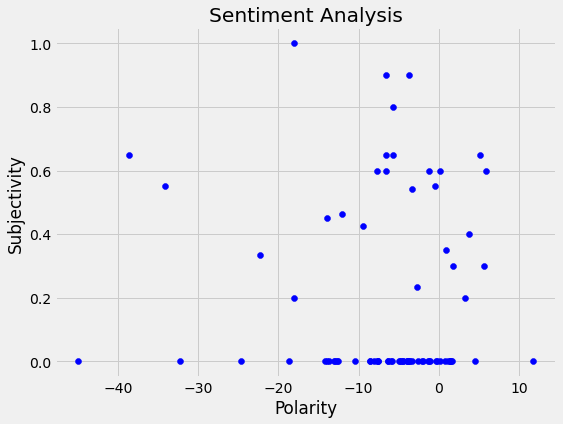

In [40]:
# Plot the polarity and subjectivity
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
    plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color='Blue')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

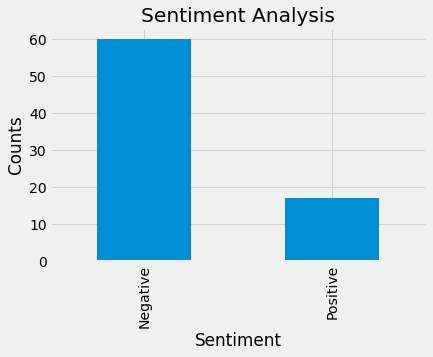

In [41]:
df['Analysis'].value_counts()

plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()